In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as font_manager

In [2]:
# 한글 폰트 찾기
import matplotlib.font_manager as font_manager

# 특정 위치에 있는 모든 폰트 찾기
font_dir = ['/Users/kimminsoo/Library/Fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)

# font.family 설정
mpl.rcParams['font.family'] = 'NanumGothicOTF'
print(mpl.rcParams['font.family'])

MesloLGS NF
Kyobo Handwriting 2021
MesloLGS NF
MesloLGS NF
MesloLGS NF
?????
NanumGothicOTF
NanumGothic
['NanumGothicOTF']


# 3. 데이터 산업의 데이터 직무별 인력현황
        1) xlsx파일에서 csv파일로 변환
        2) 'unnamed: 0' 컬럼을 삭제, 'unnamed: 1'을 '직무'로 변경, 연도 컬럼명 "년"을 제거
        3) 데이터산업의 데이터직무별 인력 현황 - 직무별 lineplot, pie chart

### 1) xlsx파일에서 csv파일로 변환

In [3]:
xlsx = pd.read_excel('../data/data_ids_jobmanpower.xlsx')
data_report = xlsx.to_csv('../data/data_ids_jobmanpower.csv')
data_ids_report = pd.read_csv('../data/data_ids_jobmanpower.csv', index_col=0).reset_index(drop=True)

data_ids_report

,Unnamed: 0,Unnamed: 1,2016년,2017년,2018년,2019년,2020년,2021년
0,데이터 처리 및 관리 솔루션 개발·공급업,데이터 아키텍트,569,618,806,1202,1588,2061
1,데이터 처리 및 관리 솔루션 개발·공급업,데이터 개발자,3835,4429,4579,4799,5683,7891
2,데이터 처리 및 관리 솔루션 개발·공급업,데이터 엔지니어,1380,1468,1616,1862,2421,3276
3,데이터 처리 및 관리 솔루션 개발·공급업,데이터 분석가,588,629,892,1039,1292,1519
4,데이터 처리 및 관리 솔루션 개발·공급업,데이터베이스관리자,648,702,842,1023,1409,1769
5,데이터 처리 및 관리 솔루션 개발·공급업,데이터 과학자,203,218,218,288,540,762
6,데이터 처리 및 관리 솔루션 개발·공급업,데이터 컨설턴트,1446,1530,1736,2076,2265,2556
7,데이터 처리 및 관리 솔루션 개발·공급업,데이터 기획자,603,697,852,1177,2075,2289
8,데이터 구축 및 컨설팅 서비스업,데이터 아키텍트,3712,3918,4330,4355,4915,6044
9,데이터 구축 및 컨설팅 서비스업,데이터 개발자,14971,15890,16302,17092,18173,21858


### 2) 'unnamed: 0' 컬럼 삭제, 'unnamed: 1'을 '직무'로 변경, 연도 컬렴명 "년"을 제거

In [4]:
# 'unnamed: 0' 컬럼 삭제
data_ids_report = data_ids_report.drop("Unnamed: 0", axis=1)

# 'unnamed:1'을 "직무"로 컬럼명 변경, 연도명 "년" 제거
data_ids_report.rename(columns={
                       data_ids_report.columns[0] : '직무',
                       data_ids_report.columns[1] : '2016',
                       data_ids_report.columns[2] : '2017',
                       data_ids_report.columns[3] : '2018',
                       data_ids_report.columns[4] : '2019',
                       data_ids_report.columns[5] : '2020',
                       data_ids_report.columns[6] : '2021'}, inplace=True)

data_ids_report

,직무,2016,2017,2018,2019,2020,2021
0,데이터 아키텍트,569,618,806,1202,1588,2061
1,데이터 개발자,3835,4429,4579,4799,5683,7891
2,데이터 엔지니어,1380,1468,1616,1862,2421,3276
3,데이터 분석가,588,629,892,1039,1292,1519
4,데이터베이스관리자,648,702,842,1023,1409,1769
5,데이터 과학자,203,218,218,288,540,762
6,데이터 컨설턴트,1446,1530,1736,2076,2265,2556
7,데이터 기획자,603,697,852,1177,2075,2289
8,데이터 아키텍트,3712,3918,4330,4355,4915,6044
9,데이터 개발자,14971,15890,16302,17092,18173,21858


### 중복되는 직무 하나의 데이터프레임으로 합치기

In [5]:
df1 = data_ids_report[0:8].reset_index(drop=True)
df2 = data_ids_report[8:16].reset_index(drop=True)
df3 = data_ids_report[16:24].reset_index(drop=True)

In [6]:
df_fin = df1 + df2 + df3

df_job = ['데이터아키텍트','데이터개발자','데이터엔지니어','데이터분석가','데이터베이스관리자','데이터과학자','데이터컨설턴트','데이터기획자']

In [7]:
for i in range(len(df_fin)):
    df_fin['직무'].loc[i] = df_job[i]

/var/folders/cy/sw8s66dd02l8b9dj7pqk2ljm0000gn/T/ipykernel_86835/1058487426.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fin['직무'].loc[i] = df_job[i]


In [8]:
df_fin

,직무,2016,2017,2018,2019,2020,2021
0,데이터아키텍트,4736,5025,5901,6509,7470,9328
1,데이터개발자,27379,29267,30022,31330,34085,42128
2,데이터엔지니어,12664,13127,13731,14592,16450,18964
3,데이터분석가,4477,4792,5820,6570,7554,9460
4,데이터베이스관리자,11488,11851,12615,12927,15199,17706
5,데이터과학자,1185,1283,1285,1608,2421,3028
6,데이터컨설턴트,4028,4263,5007,5686,6979,8979
7,데이터기획자,7299,7497,8242,9835,11809,12837


In [9]:
# 데이터 전처리 완료된 데이터프레임 csv파일로 저장
df_fin.to_csv('../data/data_ids_jobmanpower(ver2.0).csv', index=False)
df_fin.to_excel('../data/data_ids_jobmanpower(ver2.0).xlsx', index=False)

### 3) 데이터산업의 데이터직무별 인력 현황 - 직무별 lineplot, pie chart

#### 3-1) 직무별 lineplot

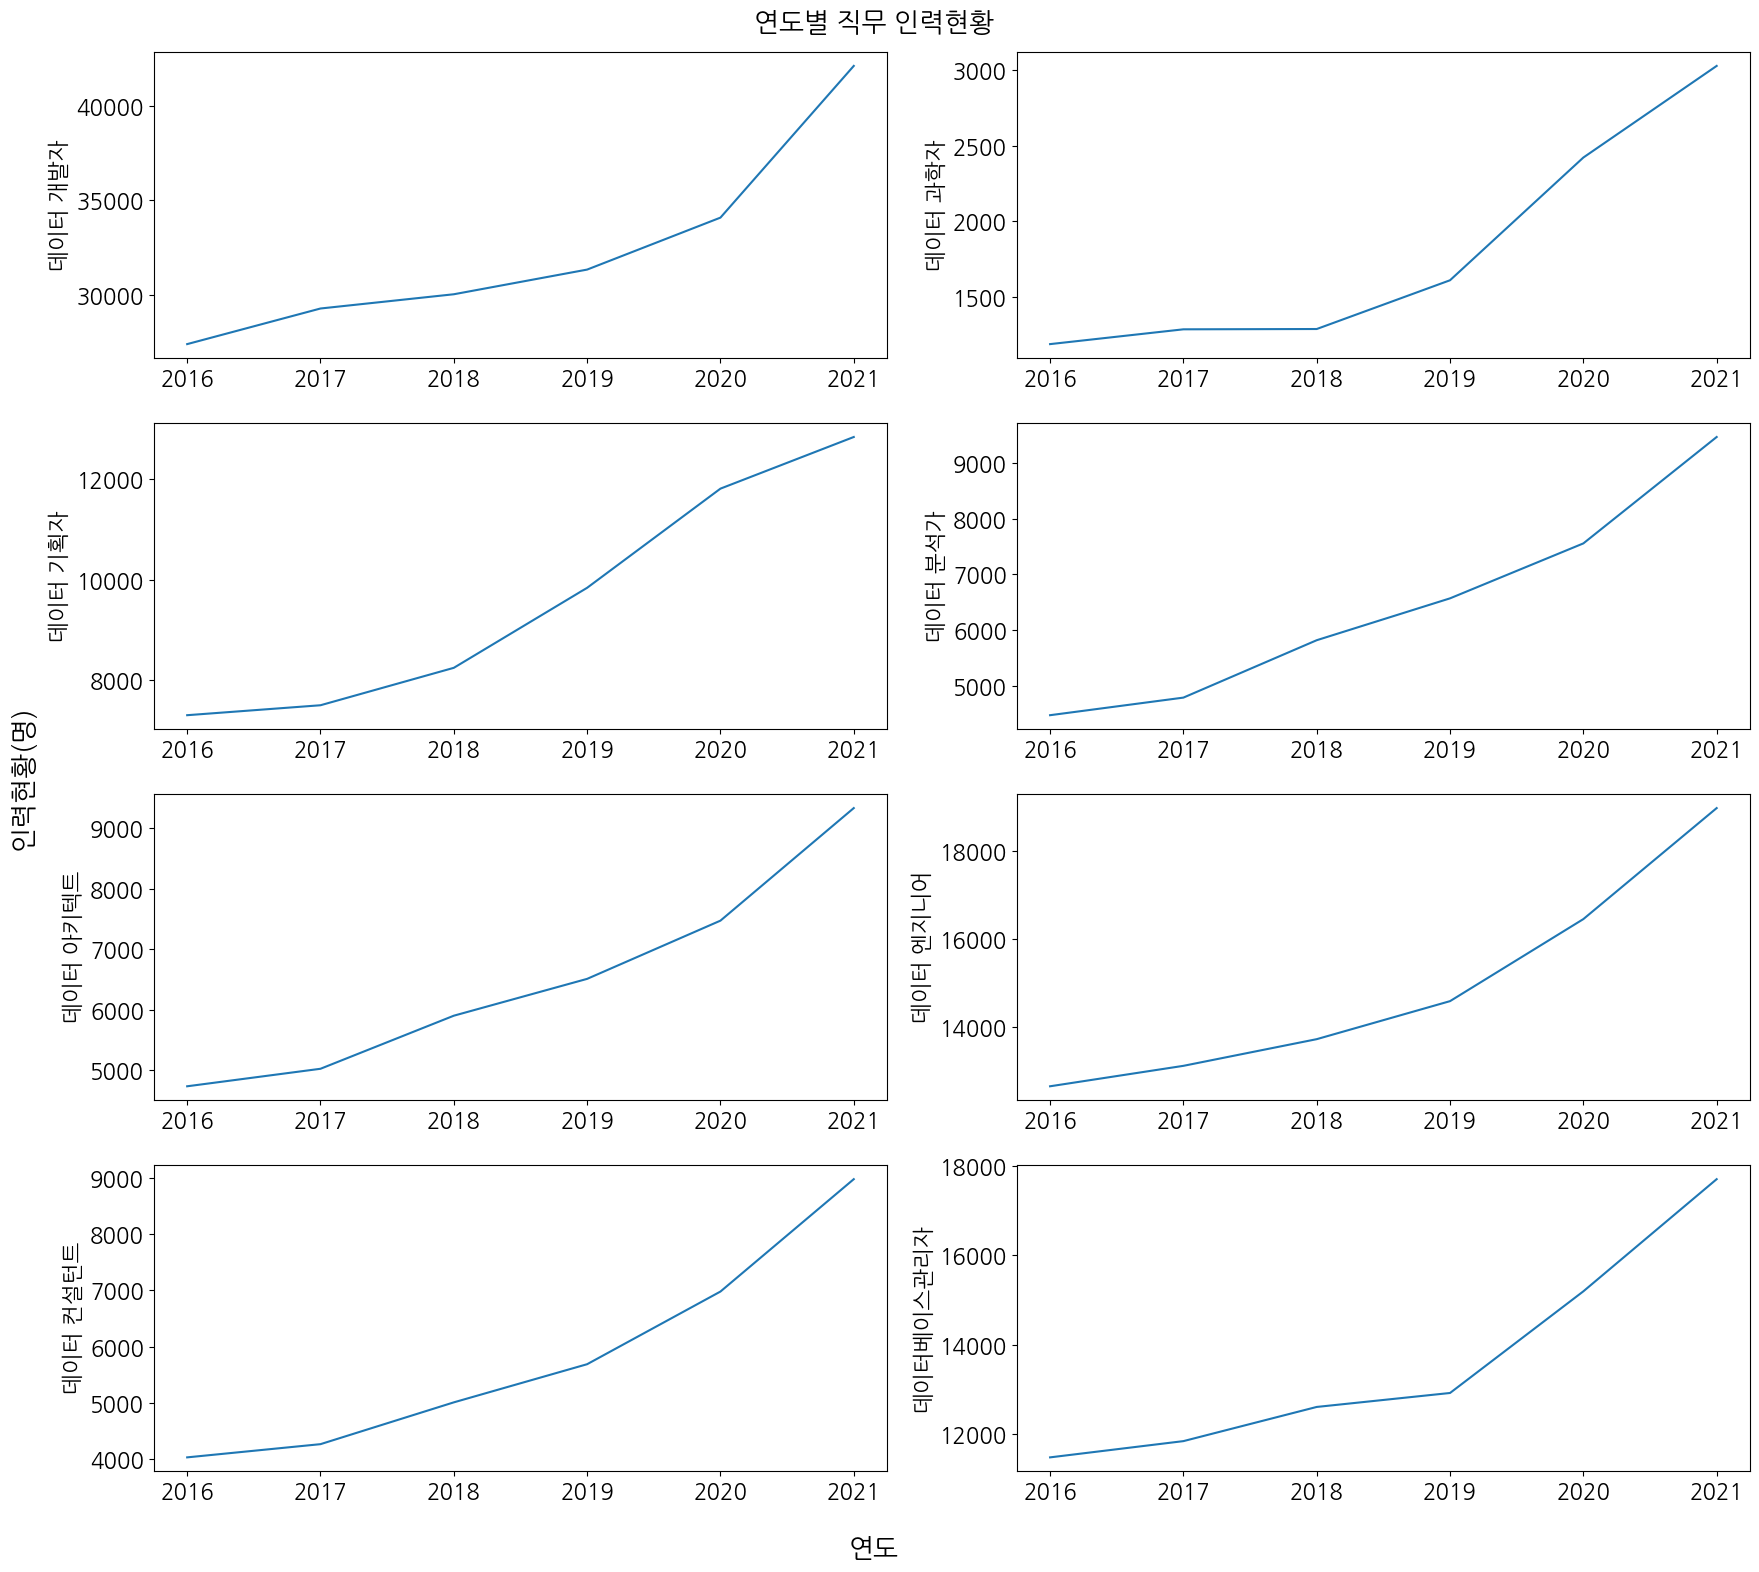

In [10]:
# 직무별 데이터 프레임으로 만들기
data_ids_report = data_ids_report.groupby("직무").sum()

# 직무별 lineplot
plt.rcParams["figure.figsize"] = (18,16)
plt.rcParams.update({'font.size': 16})
fig, axs = plt.subplots(4,2)

fig.suptitle("연도별 직무 인력현황")
fig.supxlabel("연도")
fig.supylabel("인력현황(명)")

for index in range(len(data_ids_report.index)):
    sns.lineplot(x=data_ids_report.columns,
                 y=data_ids_report.iloc[index],
                 ax=axs[index//2, index%2])

plt.tight_layout()
plt.show()

#### 3-2) 직무별 pie chart

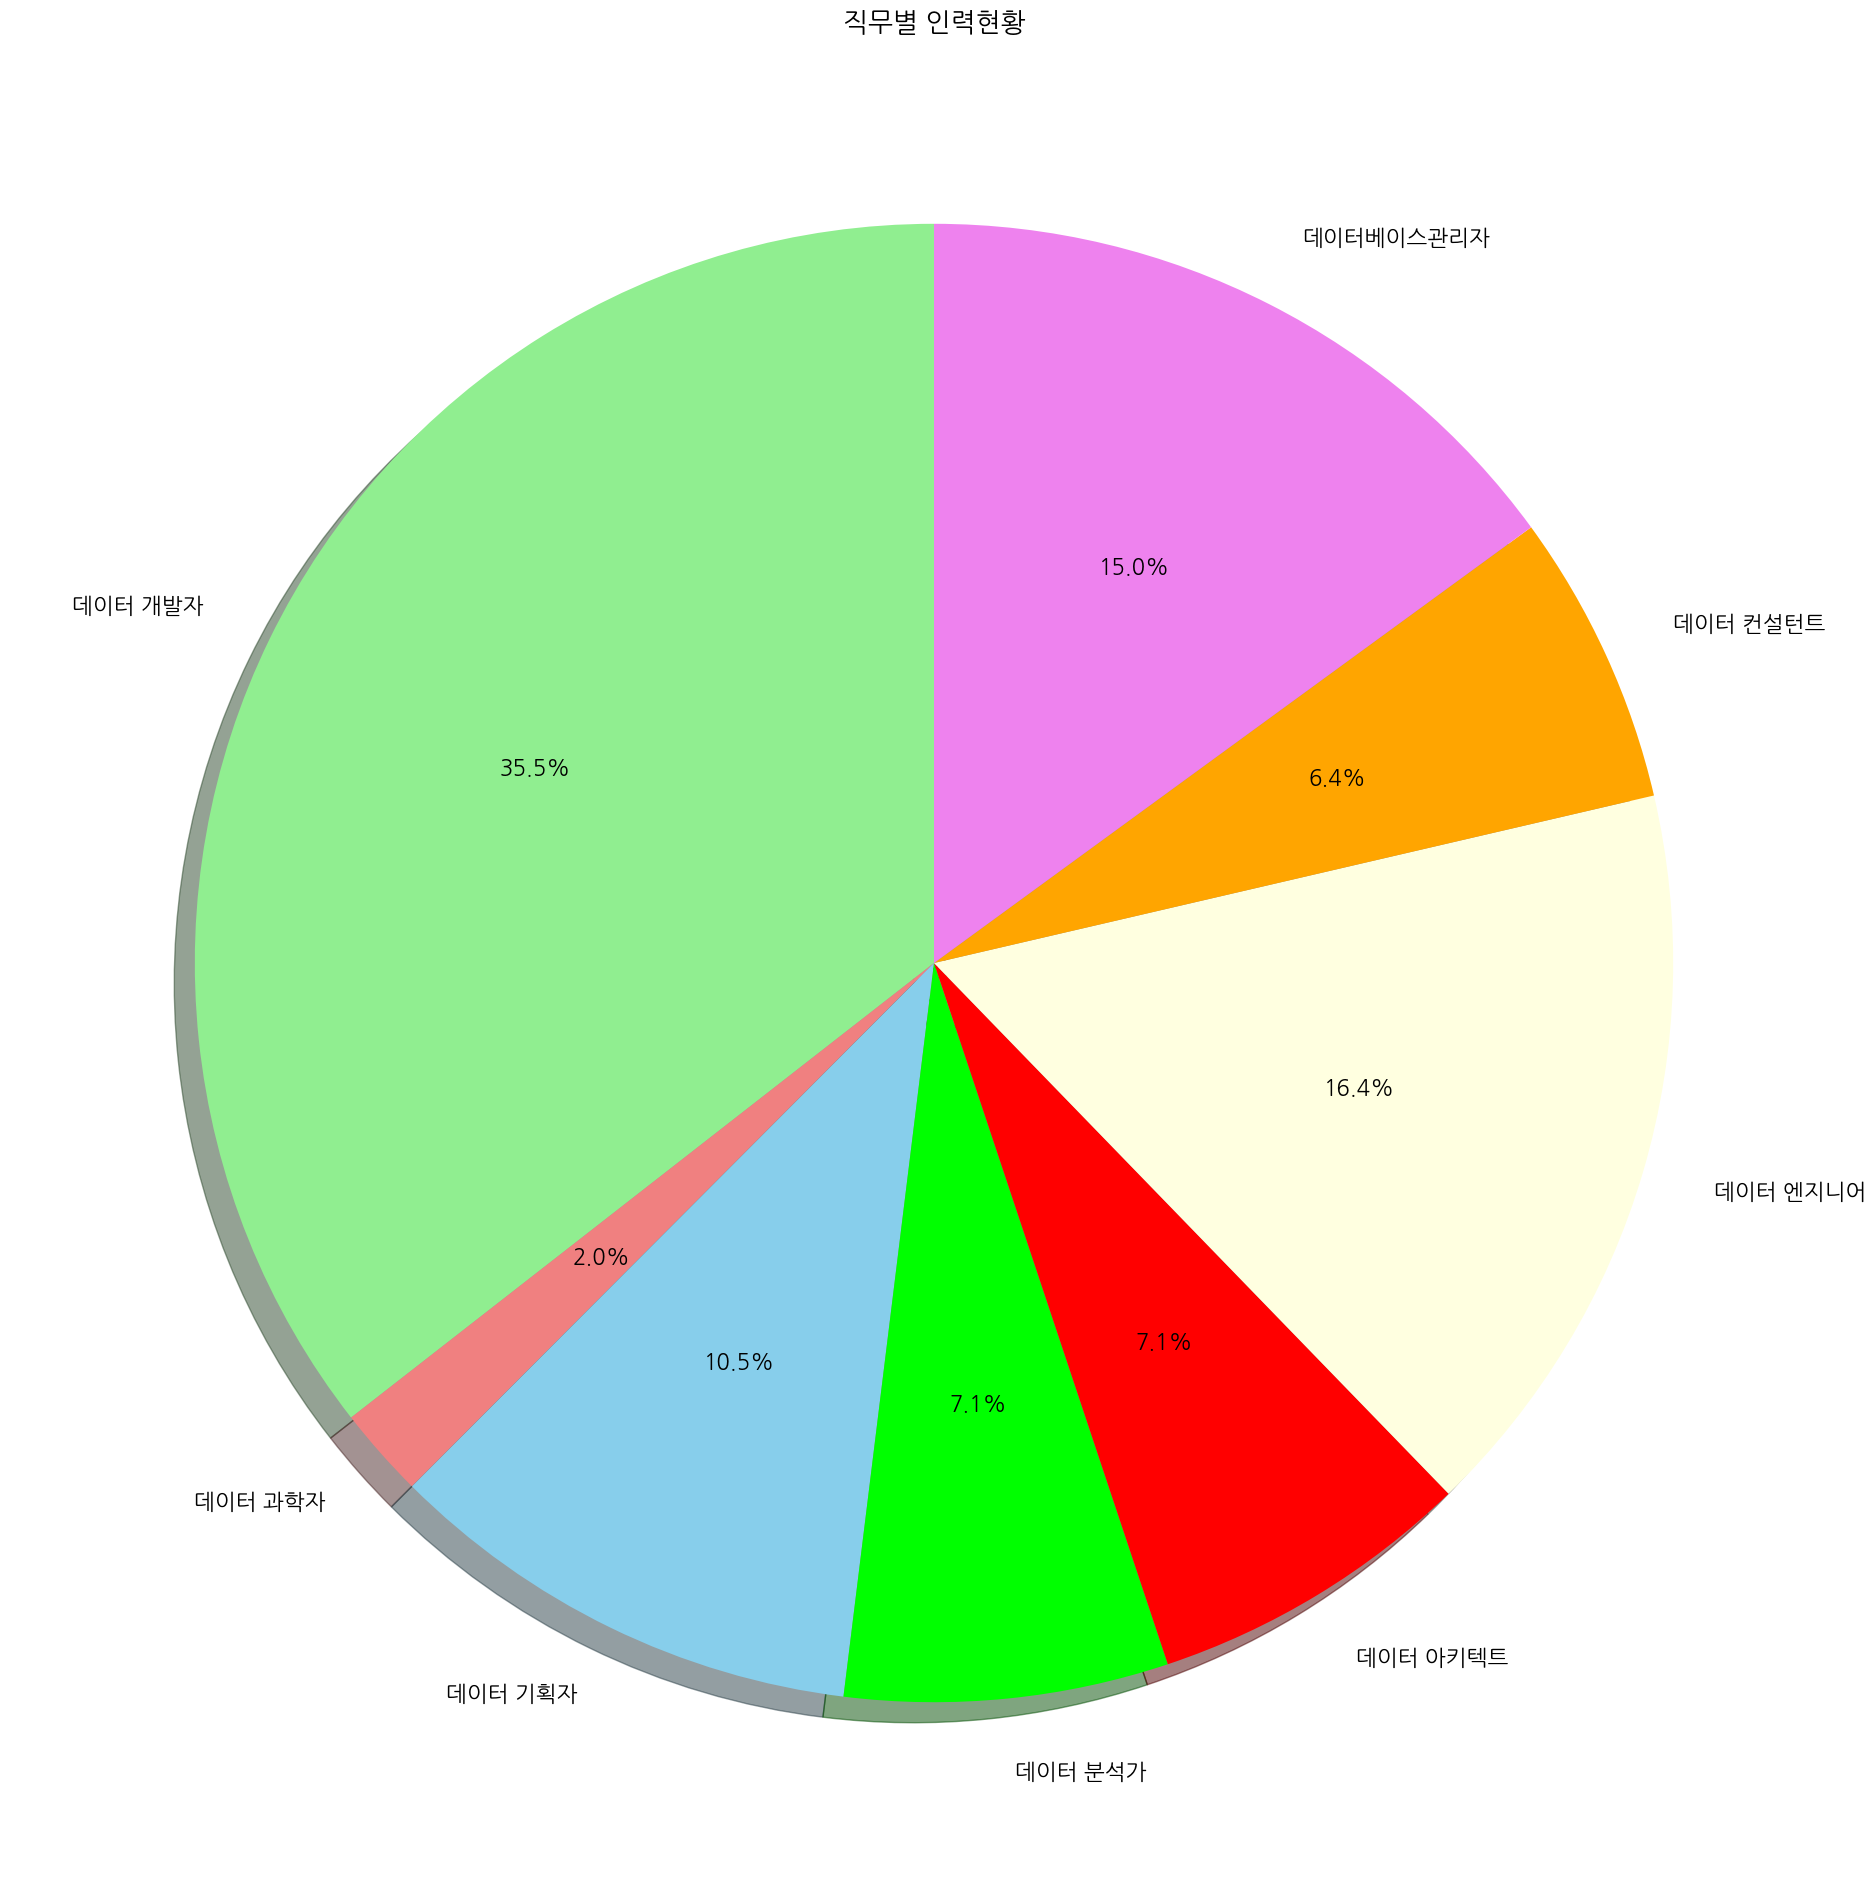

In [11]:
# 직무별 pie chart
manpower_total = data_ids_report.round(1).sum(axis=1)
manpower_totals = ((manpower_total / manpower_total.sum()) * 100)

explode = [0,0,0,0,0,0,0,0]
colors = ['lightgreen', 'lightcoral', 'skyblue', 'lime', 'red', 'lightyellow', 'orange', 'violet']

fig = plt.figure(figsize=(24,24))
plt.title('직무별 인력현황')
plt.pie(manpower_totals.values, explode=explode, labels=manpower_totals.index, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### 4) 데이터 산업의 데이터 직무별 인력현황 - 연도별 pie chart

#### 4-1) 2016년 pie chart

In [62]:
manpower_2016

직무
데이터개발자       27379
데이터과학자        1185
데이터기획자        7299
데이터베이스관리자    11488
데이터분석가        4477
데이터아키텍트       4736
데이터엔지니어      12664
데이터컨설턴트       4028
Name: 2016, dtype: int64

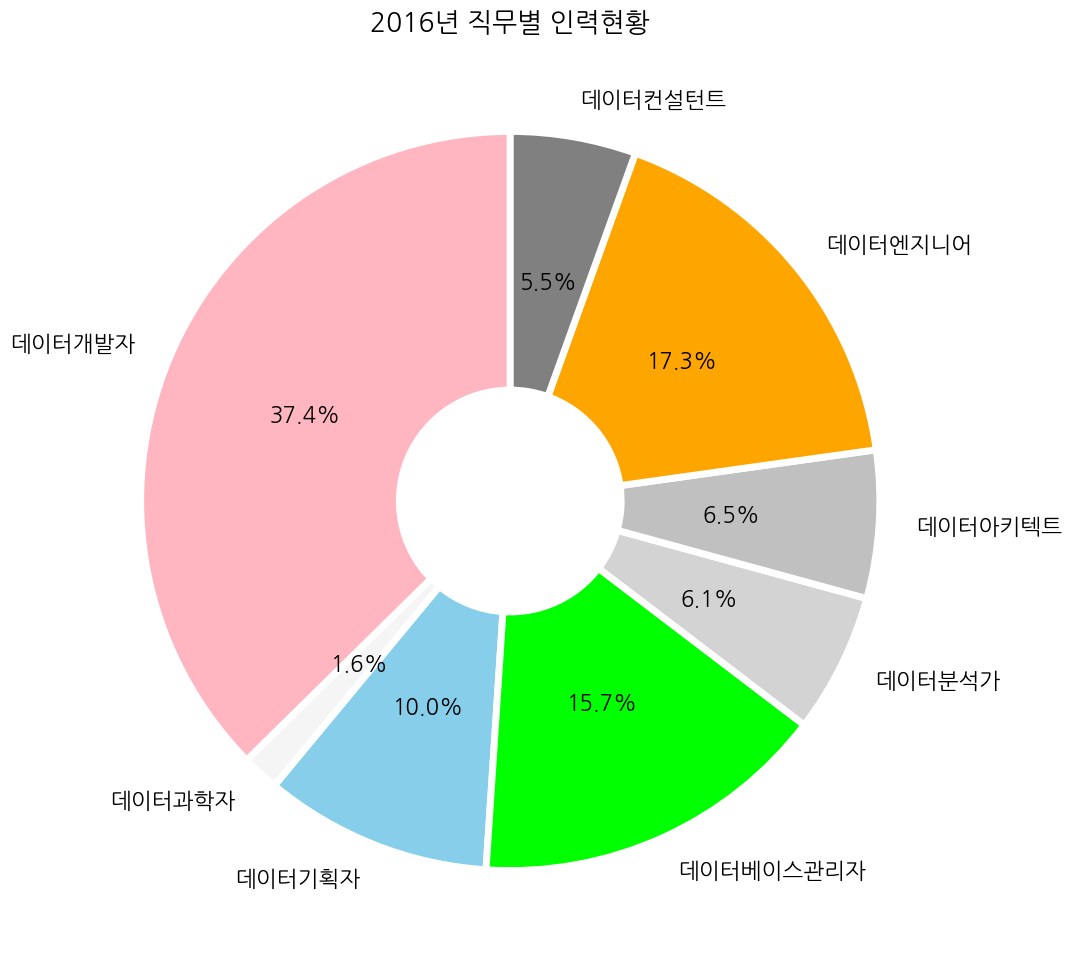

In [75]:
manpower_2016 = pd.pivot_table(data=df_fin, index=['직무'])['2016']

colors = ['lightpink', 'whitesmoke', 'skyblue', 'lime', 'lightgray', 'silver', 'orange', 'gray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(12,12))
plt.title('2016년 직무별 인력현황')
plt.pie(manpower_2016, labels=manpower_2016.index, colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)

plt.show()

#### 4-2) 2017년 pie chart

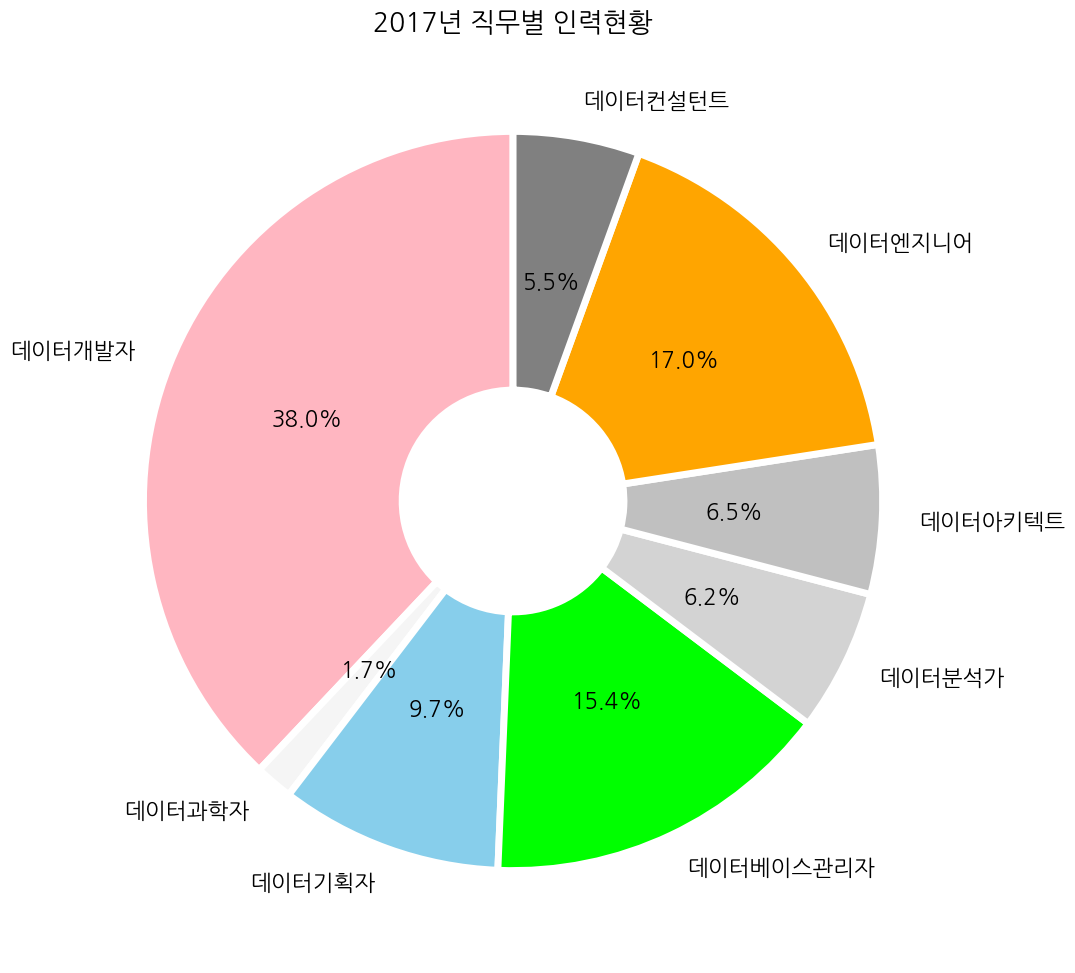

In [84]:
manpower_2017 = pd.pivot_table(data=df_fin, index=['직무'])['2017']

colors = ['lightpink', 'whitesmoke', 'skyblue', 'lime', 'lightgray', 'silver', 'orange', 'gray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(12,12))
plt.title('2017년 직무별 인력현황')
plt.pie(manpower_2017, labels=manpower_2017.index, colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)

plt.show()

#### 4-3) 2018년 pie chart

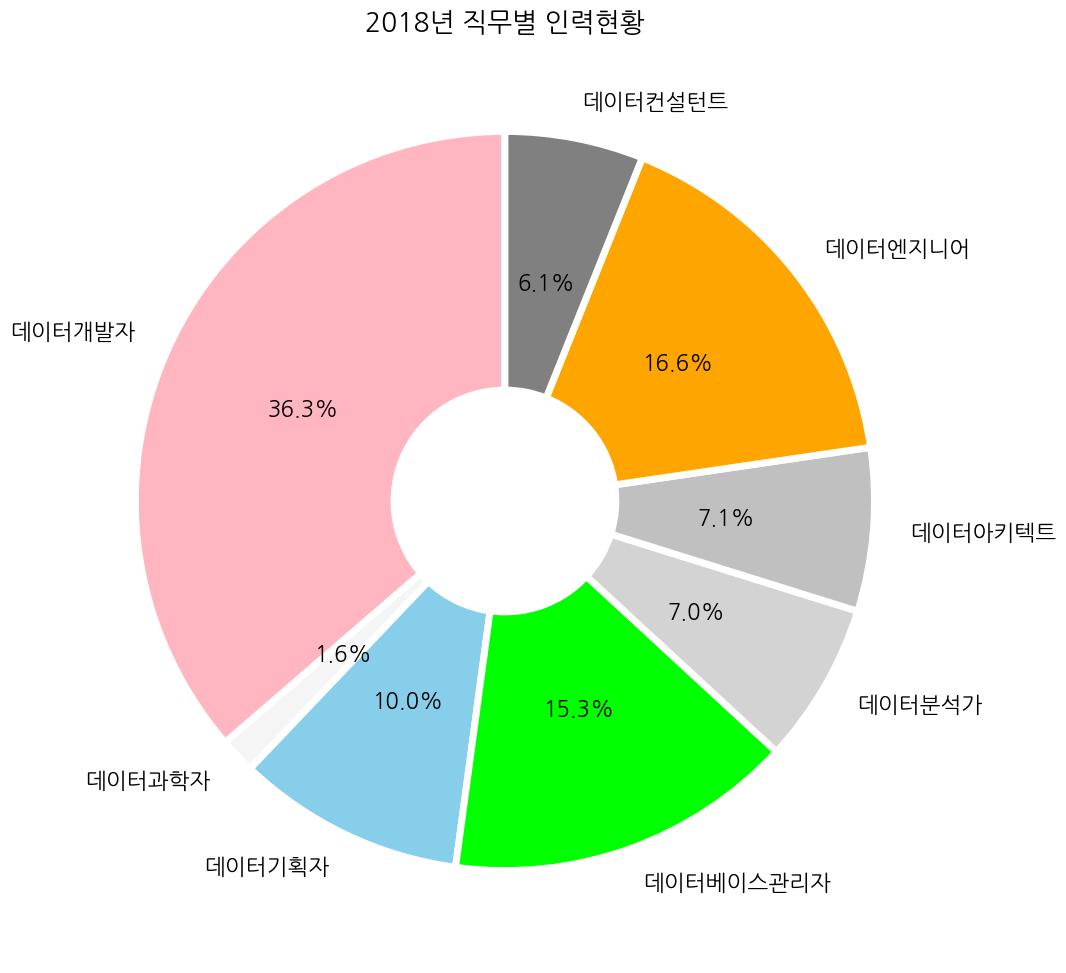

In [85]:
manpower_2018 = pd.pivot_table(data=df_fin, index=['직무'])['2018']

colors = ['lightpink', 'whitesmoke', 'skyblue', 'lime', 'lightgray', 'silver', 'orange', 'gray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(12,12))
plt.title('2018년 직무별 인력현황')
plt.pie(manpower_2018, labels=manpower_2018.index, colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)

plt.show()

#### 4-4) 2019년 pie chart

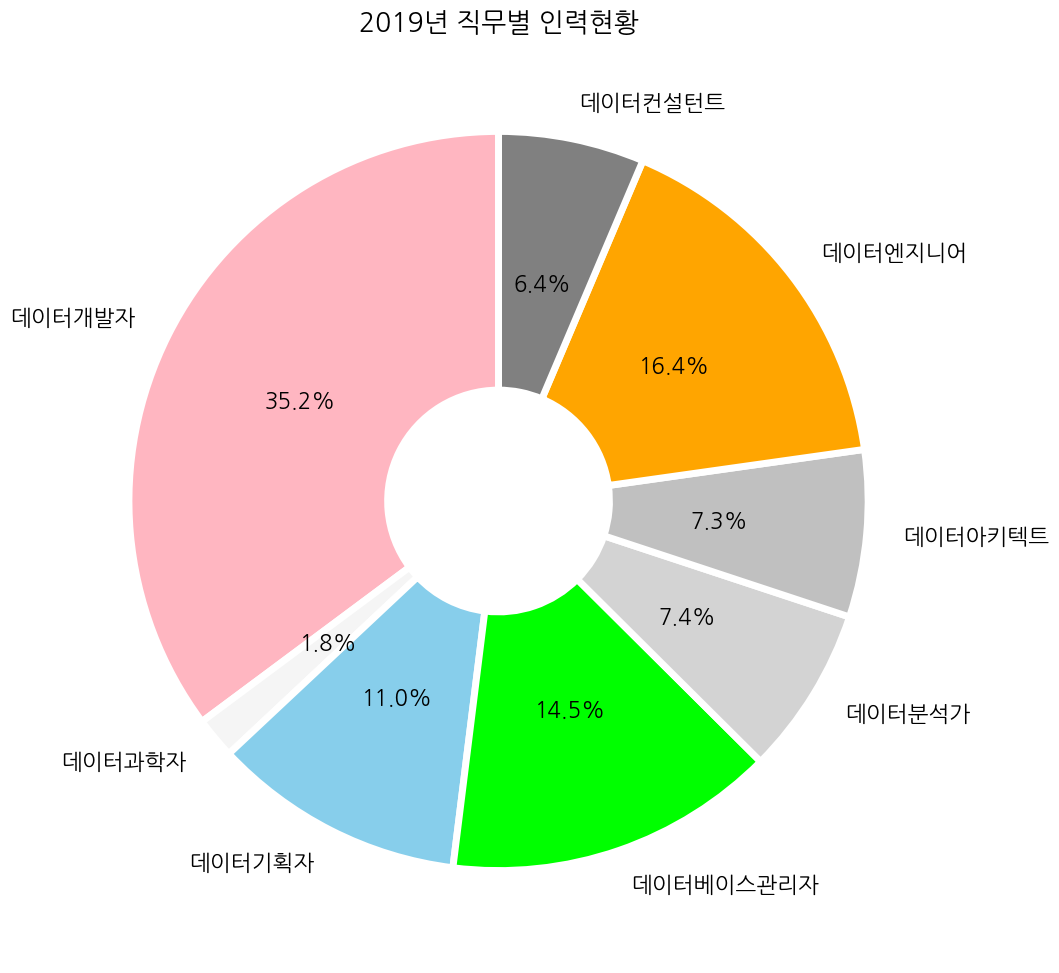

In [86]:
manpower_2019 = pd.pivot_table(data=df_fin, index=['직무'])['2019']

colors = ['lightpink', 'whitesmoke', 'skyblue', 'lime', 'lightgray', 'silver', 'orange', 'gray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(12,12))
plt.title('2019년 직무별 인력현황')
plt.pie(manpower_2019, labels=manpower_2019.index, colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)

plt.show()

#### 4-5) 2020년 pie chart

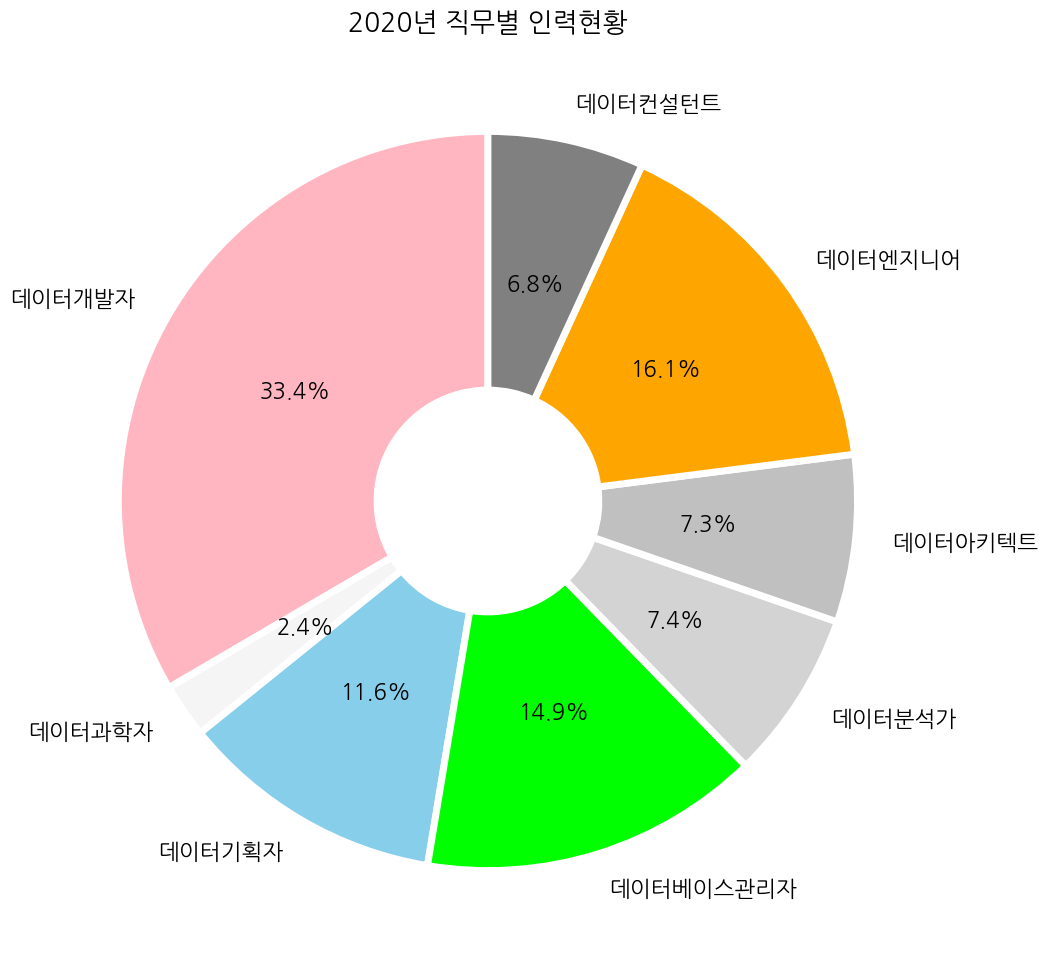

In [82]:
manpower_2020 = pd.pivot_table(data=df_fin, index=['직무'])['2020']

colors = ['lightpink', 'whitesmoke', 'skyblue', 'lime', 'lightgray', 'silver', 'orange', 'gray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(12,12))
plt.title('2020년 직무별 인력현황')
plt.pie(manpower_2020, labels=manpower_2020.index, colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)

plt.show()

#### 4-6) 2021년 pie chart

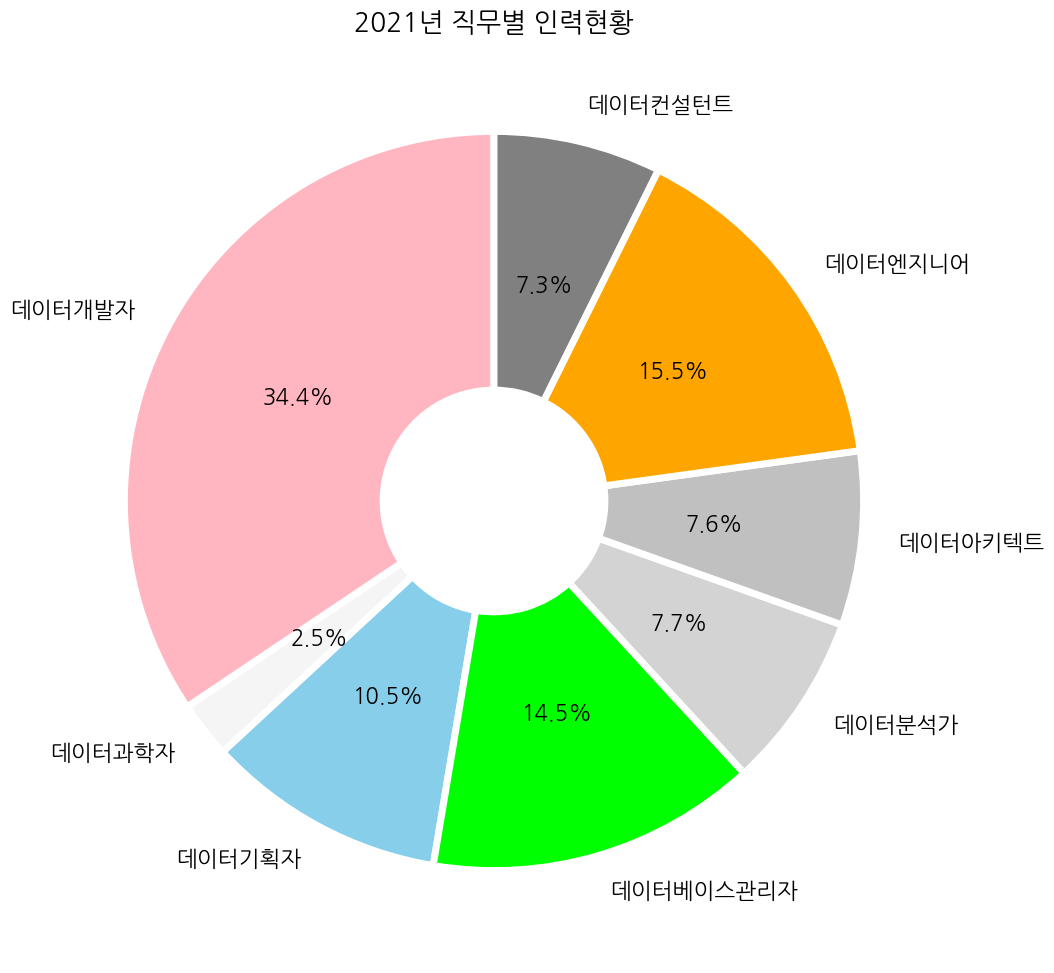

In [83]:
manpower_2021 = pd.pivot_table(data=df_fin, index=['직무'])['2021']

colors = ['lightpink', 'whitesmoke', 'skyblue', 'lime', 'lightgray', 'silver', 'orange', 'gray']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

fig = plt.figure(figsize=(12,12))
plt.title('2021년 직무별 인력현황')
plt.pie(manpower_2021, labels=manpower_2021.index, colors=colors,
        autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)

plt.show()